In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [2]:

lst_fire_img = glob.glob('C:\\Users\\cse\\Desktop\\kaggle\\archive (1)\\fire_dataset\\fire_images\\*.png')
lst_non_fire_img = glob.glob('C:\\Users\\cse\\Desktop\\kaggle\\archive (1)\\fire_dataset\\non_fire_images\\*.png')


In [3]:
lst_fire = []
for x in lst_fire_img[:243]:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img[:243]:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [4]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,1
1,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,1
2,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,0
3,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,0
4,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,0
5,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,0
6,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,1
7,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,1
8,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,0
9,C:\Users\cse\Desktop\kaggle\archive (1)\fire_d...,0


In [5]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 755
Number of images with fire : 243


In [6]:
filepath_img = 'Dataset/non_fire/non_fire.189.png'
df = df.loc[~(df.loc[:,'files'] == filepath_img),:]

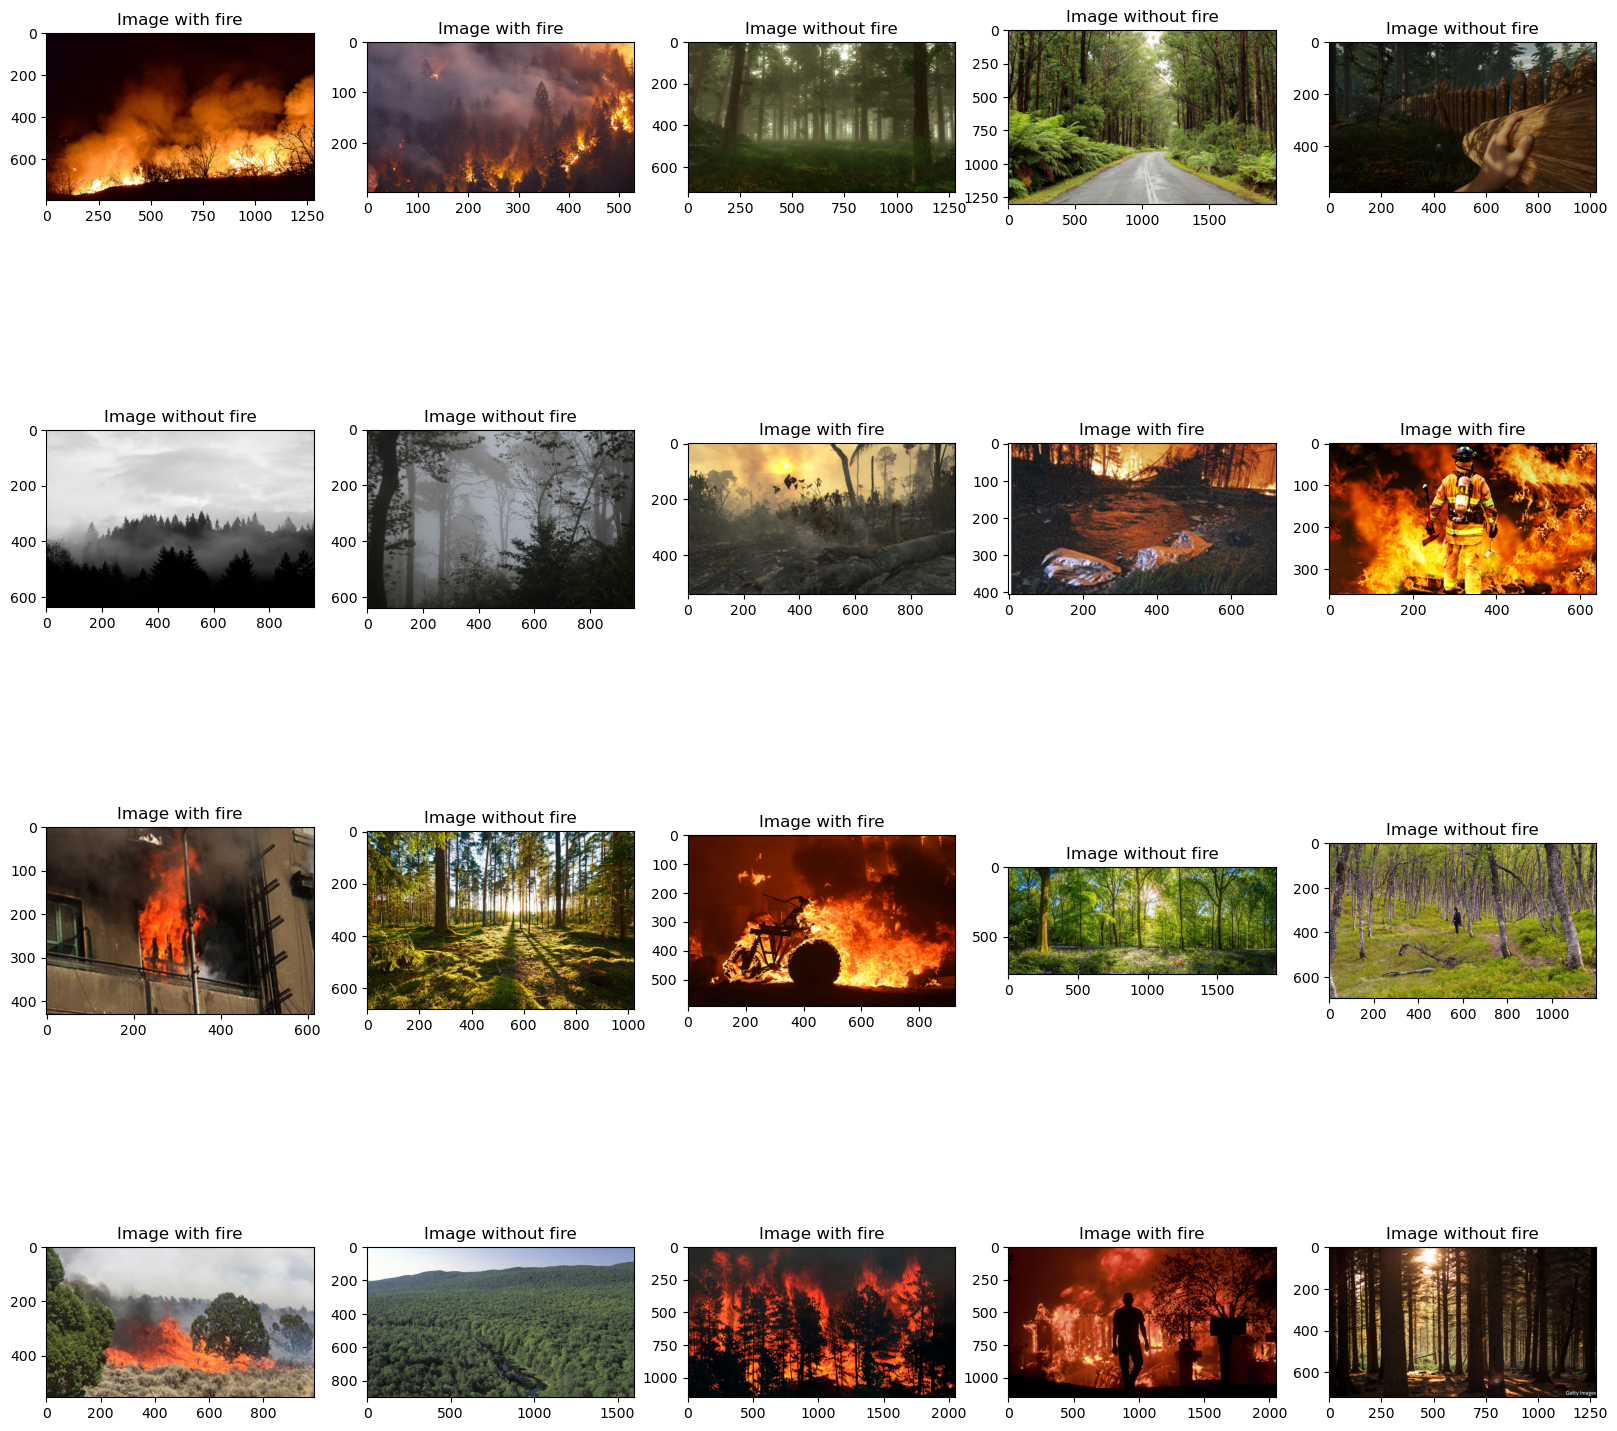

In [7]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):

    plt.subplot(4,5,i+1)


    if "non_fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

In [8]:
df.shape

(486, 2)

c:\Users\cse\anaconda3\envs\fire\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cse\anaconda3\envs\fire\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cse\anaconda3\envs\fire\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


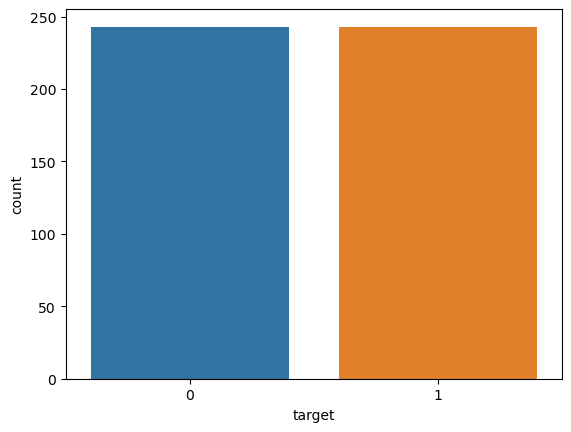

In [11]:


sns.countplot(x = "target",data = df)

plt.show()

In [12]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath) #read
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
  img = cv2.resize(img,(196,196))  # resize
  img = img / 255 #scale
  return img

In [13]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)

  return np.array(X),np.array(y)

In [14]:
X, y = create_format_dataset(df)

In [15]:
X.shape

(486, 196, 196, 3)

In [16]:
y.shape

(486,)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((388, 196, 196, 3), (98, 196, 196, 3), (388,), (98,))

In [20]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 128)     1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [34]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

Epoch 1/30
22/22 [==============================] - 257s 12s/step - loss: 0.4981 - accuracy: 0.8639 - val_loss: 0.1903 - val_accuracy: 0.9267
Epoch 2/30
22/22 [==============================] - 229s 10s/step - loss: 0.1610 - accuracy: 0.9384 - val_loss: 0.1777 - val_accuracy: 0.9267
Epoch 3/30
22/22 [==============================] - 227s 10s/step - loss: 0.0972 - accuracy: 0.9713 - val_loss: 0.1505 - val_accuracy: 0.9200
Epoch 4/30
22/22 [==============================] - 226s 10s/step - loss: 0.1010 - accuracy: 0.9642 - val_loss: 0.1150 - val_accuracy: 0.9633
Epoch 5/30
22/22 [==============================] - 225s 10s/step - loss: 0.0762 - accuracy: 0.9713 - val_loss: 0.0934 - val_accuracy: 0.9633
Epoch 6/30
22/22 [==============================] - 221s 10s/step - loss: 0.0387 - accuracy: 0.9857 - val_loss: 0.0564 - val_accuracy: 0.9800
Epoch 7/30
22/22 [==============================] - 220s 10s/step - loss: 0.0246 - accuracy: 0.9928 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 

In [ ]:
loss=model_history.history["loss"]
plt.plot(loss)
plt.title("loss vs epoch")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()

In [35]:
y_pred = model.predict(X_test)

10/10 [==============================] - 42s 4s/step


In [36]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [37]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [1]:
plt.figure(figsize = (15,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

NameError: ignored

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.99      0.98      0.99       227

    accuracy                           0.98       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.98      0.98      0.98       300



In [7]:
#Files
path='/kaggle/input/fire-dataset/fire_dataset'
pd.DataFrame(os.listdir(path),columns=['Files'])

NameError: ignored

In [ ]:
train_data_dir =path
batch_size = 32
target_size = (224, 224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
)

In [ ]:
class_names = train.class_names
class_names

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
model=keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.summary()